# The Yeast in a Culture
Logistic population growth model

## The data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mpl_config

In [2]:
time = np.arange(19)

In [3]:
observed = np.array([9.6,
18.3,
29.0,
47.2,
71.1,
119.1,
174.6,
257.3,
350.7,
441.0,
513.3,
559.7,
594.8,
629.4,
640.8,
651.1,
655.9,
659.6,
661.8])

## Ploting the data

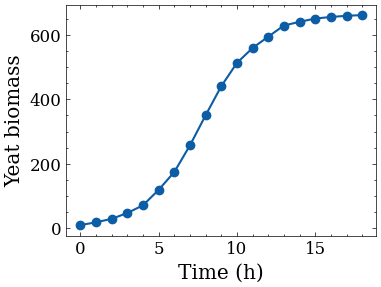

In [4]:
plt.plot(time, observed, marker="o")
plt.xlabel("Time (h)")
plt.ylabel("Yeat biomass")
plt.show()

## Linear least squares fit

In [5]:
M = 665
P = observed

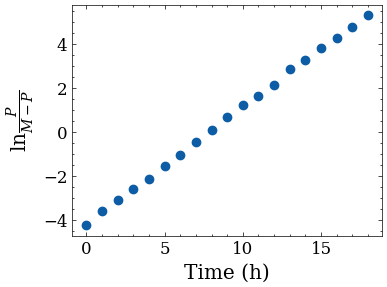

In [6]:
plt.scatter(time, np.log(P/(M-P)), marker="o")
plt.xlabel("Time (h)")
plt.ylabel(r"${\rm{ln}}\frac{P}{M-P}$")
plt.show()

In [7]:
# first try numpy polyfit
slope, intercept = np.polyfit(time, np.log(P/(M-P)), deg=1)
slope, intercept

(np.float64(0.5306746627219533), np.float64(-4.163572101473056))

Why is it different from the textbook? I have no idea!

In [8]:
# then scipy linear regression
import scipy

In [9]:
scipy.stats.linregress(time, np.log(P/(M-P)))

LinregressResult(slope=np.float64(0.5306746627219531), intercept=np.float64(-4.163572101473055), rvalue=np.float64(0.9998025122201444), pvalue=np.float64(2.2433224210480064e-30), stderr=np.float64(0.0025583109916853066), intercept_stderr=np.float64(0.02695347880051371))

In [10]:
r = slope / M
r

np.float64(0.0007980070116119599)

In [11]:
P0 = M / (1 + np.exp(-intercept))
P0

np.float64(10.183642179795761)

## Make predictions

In [12]:
P_pred = M * P0 / (P0 + (M-P0) * np.exp(-r*M*time))

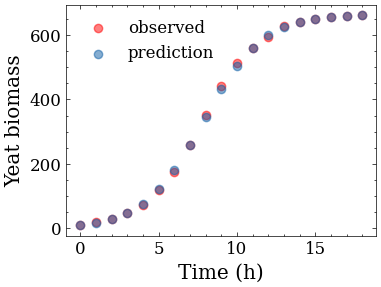

In [13]:
plt.scatter(time, P, alpha=0.5, color="red", label="observed")
plt.scatter(time, P_pred, alpha=0.5, label="prediction")
plt.xlabel("Time (h)")
plt.ylabel("Yeat biomass")
plt.legend()
plt.show()

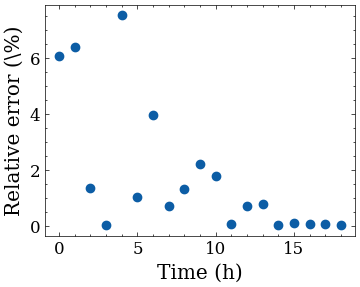

In [14]:
plt.scatter(time, np.abs((P-P_pred) / P) * 100)
plt.xlabel("Time (h)")
plt.ylabel(r"Relative error (\%)")
plt.show()

## Problems
- What about slightly different values of the slope and interception?
- How to obtain the values of the population at continuous time?